In [1]:
import numpy as np
from matplotlib import image, pyplot
from PIL import Image, ImageOps
import glob
import os

In [2]:
def loadDataSet(folderPath, fileName):
    dataset = []
    images = []
    for filename in glob.glob(folderPath+fileName):
        image = ImageOps.grayscale(Image.open(filename)).resize((10,10)).convert('L')
        images.append((image, filename))
        makeFeatureMatrix = (np.array(image)//255).round(0).flatten()
        dataset.append(makeFeatureMatrix)
    return dataset, images

In [3]:
def getInputFeature(folderPath, trainingData):
    X=[]
    outputMatrix = []
    images = []
    outputType = np.identity(len(folderPath), dtype=int)
    filename = "*png"
    for i in range(len(folderPath)):
        dataset, allimages = loadDataSet(folderPath[i], filename)
        X.extend(dataset)
        images.extend(allimages)
        outputMatrix.extend([outputType[i] for j in range(len(dataset))])
    if(trainingData):
        return images, np.array(X), np.array(outputMatrix)
    else:
        return images, np.array(X)

### Training dataset images

These can be found in folder mentioned in the list, below, named folderPath

In [4]:
folderPath = ["traindb/p/", "traindb/n/", "traindb/a/"]
images, inputMatrix, outputMatrix = getInputFeature(folderPath, True)
inputMatrix = inputMatrix.T
outputMatrix = (outputMatrix).T

print("Input:\n")
for input in inputMatrix:
    print(input)
print("Output:\n",outputMatrix)

Input:

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
[0 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
[0 1 1 0 1 1 1 0 0 1 1 1 1 1 1]
[0 1 1 0 1 1 1 1 0 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 1 0 0 1 1 1 1 1]
[0 0 0 0 0 0 1 0 0 1 0 1 0 1 0]
[0 0 0 0 0 1 1 1 1 1 0 1 0 0 0]
[0 0 0 0 0 1 1 0 0 0 1 1 1 1 1]
[0 0 0 0 0 1 0 0 0 0 1 0 1 1 1]
[0 0 0 0 1 0 0 1 0 0 1 0 1 1 1]
[0 0 1 0 1 0 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0 1 1 0 1 0 0 0]
[0 0 0 1 0 1 1 0 0 0 1 0 1 0 0]
[0 0 0 1 0 0 0 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 1 1 0 1 0 1 1 1]
[0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
def initParameters(inpSize, outSize):
    np.random.seed(1)
    bias = np.zeros(shape=(outSize, 1))
    weights = np.random.randn(outSize, inpSize) * 0.01
    
    assert(bias.shape == (outSize, 1))
    assert(weights.shape == (outSize, inpSize))
    
    return [weights, bias]

## Initialize parameters according to architechture of Neural Network


since this is two layer model, which consists of 1 hidden layer 
hence model will be structured as 100(input nodes) --> 10(hidden nodes) --> 3(output nodes)

In [6]:
parameters = []
layer_one_param = initParameters(100, 10)
parameters.append(layer_one_param)
layer_two_param = initParameters(10, 3)
parameters.append(layer_two_param)

print("Weights, Bias for layer 1:", parameters[0][0], "\n", parameters[0][1])
print("Weights, Bias for layer 2:", parameters[1][0], "\n", parameters[1][1])

Weights, Bias for layer 1: [[ 1.62434536e-02 -6.11756414e-03 -5.28171752e-03 -1.07296862e-02
   8.65407629e-03 -2.30153870e-02  1.74481176e-02 -7.61206901e-03
   3.19039096e-03 -2.49370375e-03  1.46210794e-02 -2.06014071e-02
  -3.22417204e-03 -3.84054355e-03  1.13376944e-02 -1.09989127e-02
  -1.72428208e-03 -8.77858418e-03  4.22137467e-04  5.82815214e-03
  -1.10061918e-02  1.14472371e-02  9.01590721e-03  5.02494339e-03
   9.00855949e-03 -6.83727859e-03 -1.22890226e-03 -9.35769434e-03
  -2.67888080e-03  5.30355467e-03 -6.91660752e-03 -3.96753527e-03
  -6.87172700e-03 -8.45205641e-03 -6.71246131e-03 -1.26645989e-04
  -1.11731035e-02  2.34415698e-03  1.65980218e-02  7.42044161e-03
  -1.91835552e-03 -8.87628964e-03 -7.47158294e-03  1.69245460e-02
   5.08077548e-04 -6.36995647e-03  1.90915485e-03  2.10025514e-02
   1.20158952e-03  6.17203110e-03  3.00170320e-03 -3.52249846e-03
  -1.14251820e-02 -3.49342722e-03 -2.08894233e-03  5.86623191e-03
   8.38983414e-03  9.31102081e-03  2.85587325e-03

In [7]:
def sigmoid(X):
    Y = 1/(1+np.exp(-X))
    return Y

In [8]:
def differentialSigmoid(X, delBack):
    Y = 1/(1+np.exp(-X))
    dX = delBack*Y*(1-Y)
    assert(dX.shape == X.shape)
    
    return dX

In [9]:
def linearForward(X, wts, bias):
    Yin = np.dot(wts, X) + bias
    
    assert(Yin.shape == (wts.shape[0], X.shape[1]))
    
    return Yin

In [10]:
def forwardActivation(X, wts, bias):
    Yin = linearForward(X, wts, bias)
    Y = sigmoid(Yin)
    
    assert(Y.shape == (wts.shape[0], X.shape[1]))
    
    return Y, Yin

In [11]:
def linearBackProp(delY, layerCache):
    Yin, X, wts, bias, Yout = layerCache
    dY = differentialSigmoid(Yin, delY)
    m = X.shape[1]
    dW = np.dot(dY, X.T)*1.0/m
    dB = np.sum(dY, axis = 1, keepdims = True)
    dX = np.dot(wts.T, dY)
    return dX, dW, dB

In [12]:
def computeCost(Y, target):
    m = Y.shape[1]
    error = np.sum(np.power(Y-target, 2))
    cost = np.squeeze(error/m)
    return (cost, error)

In [13]:
def update_param(parameters, delParams, alpha):
    
    L = len(delParams)
    
    for i in range(L):
        parameters[i][0] -= alpha * delParams[i][0]
        parameters[i][1] -= alpha * delParams[i][1]
    return parameters

In [14]:
def trainModel(inputMatrix, outputMatrix, parameters, alpha = 0.05):
    wts = []
    bias = []
    costs = []
    layerCache = []
    grad = []
    epochCount = 0
    
    stopCondition = False
    
    while(not stopCondition and epochCount<100000):
        for param in parameters:
            wts.append(param[0])
            bias.append(param[1])
        
        Y = inputMatrix
        epochCount += 1
        error = 0
        layerCache = []
        for i in range(len(parameters)):
            inputgrid = Y
            Y, Yin = forwardActivation(inputgrid, wts[i], bias[i])
            layerCache.append((Yin, inputgrid, wts[i], bias[i], Y))
            
        cost, error = computeCost(Y, outputMatrix)
        
#         if(epochCount%200==0):
#             print("iteration #{} \n  Cost: {} \n  Error: {}".format(epochCount, cost, error))
        
        #  error backpropagation
        
        delY = -2*(outputMatrix - Y)
        
        delH, delWh, delBh = linearBackProp(delY, layerCache[1])
        delX, delWx, delBx = linearBackProp(delH, layerCache[0])
        
        delParams = [[delWx, delBx],[delWh, delBh]]
        
        parameters = update_param(parameters, delParams, alpha)
        
        if(error<0.005):
            stopCondition = True
    print("iteration #{} \n  Cost: {} \n  Error: {}".format(epochCount, cost, error))
    return parameters

In [15]:
parameters = trainModel(inputMatrix, outputMatrix, parameters, 0.5)

iteration #5136 
  Cost: 0.0003332898859822662 
  Error: 0.004999348289733993


In [16]:
def testModel(folderPath, parameters):
    
    images, test_input  = getInputFeature(folderPath, False)

    print("Input:\n",len(test_input))
    Y = test_input
    Y=np.array(Y).T
    wts = []
    bias = []
    for param in parameters:
            wts.append(param[0])
            bias.append(param[1])
    for i in range(len(parameters)):
            inputgrid = Y
            Y, Yin = forwardActivation(inputgrid, wts[i], bias[i])
    Y = Y.T
    for case in range(len(Y)):
        pyplot.imshow(images[case][0])
        pyplot.show()
        print(images[case][1])
        
        temp=Y[case].tolist()
        ans_idx=temp.index(max(temp))
        
        print(temp)
        if(ans_idx==0):
            print("predicted P")
        elif(ans_idx==1):
            print("predicted N")
        else:
            print("predicted A")
    

Input:
 3


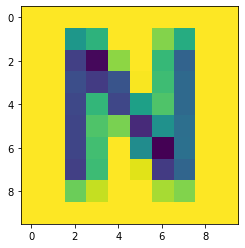

testdb/N1.png
[0.010291986771646382, 0.9720852356615571, 0.021014529590814776]
predicted N


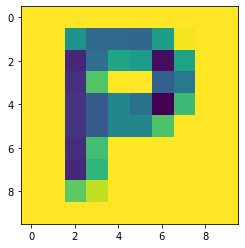

testdb/P1.png
[0.8057873478670691, 0.25684655586632993, 0.003533987512472356]
predicted P


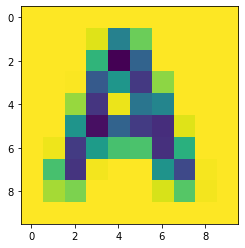

testdb/A1.png
[0.0024164818952874955, 0.03420853835186503, 0.9685239394300417]
predicted A
Input:
 15


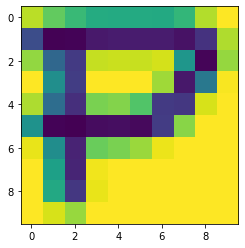

traindb/p2.png
[0.9914911750648441, 0.009663396742748883, 0.002985860687966048]
predicted P


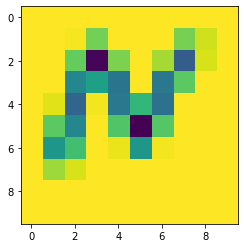

traindb/n3.png
[0.012906478970041126, 0.9863739312384504, 0.009237760270116241]
predicted N


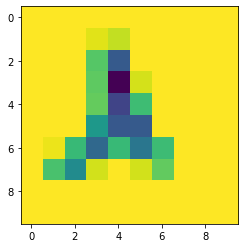

traindb/a5.png
[0.0026756527695621056, 0.010716200992441687, 0.9870990690064821]
predicted A


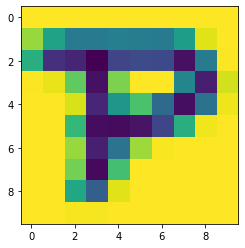

traindb/p3.png
[0.9891284129822147, 0.010218782532561088, 0.0035982173170702224]
predicted P


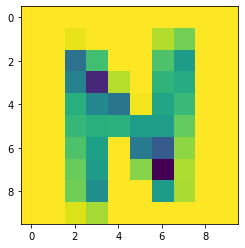

traindb/n1.png
[0.009553342010904542, 0.9871440294442537, 0.011660164059665322]
predicted N


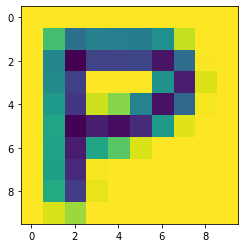

traindb/p1.png
[0.9883947404634913, 0.012514424448056779, 0.0032089080693394325]
predicted P


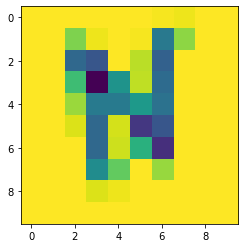

traindb/n2.png
[0.013927641048001791, 0.9868415067496225, 0.008351668161757189]
predicted N


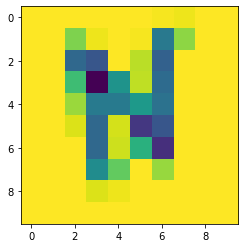

traindb/n4.png
[0.013927641048001791, 0.9868415067496225, 0.008351668161757189]
predicted N


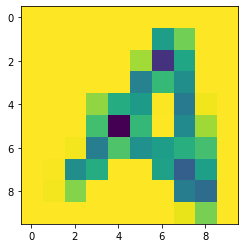

traindb/a1.png
[0.0022290993677809385, 0.011256726050803407, 0.9886508562133858]
predicted A


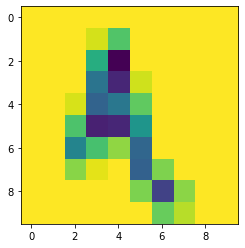

traindb/a4.png
[0.0024996600517531112, 0.00995008522557892, 0.9886272627801562]
predicted A


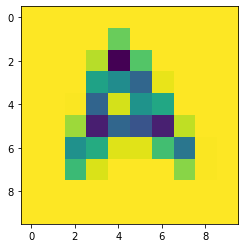

traindb/a3.png
[0.002324038779257164, 0.011872257243734146, 0.9876562677876972]
predicted A


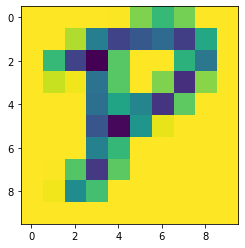

traindb/p5.png
[0.9902052631650071, 0.008961784145169268, 0.0036425177457701597]
predicted P


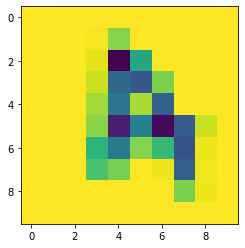

traindb/a2.png
[0.0023769843899558323, 0.006493362375516721, 0.992451924808738]
predicted A


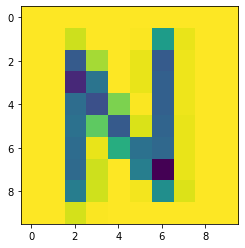

traindb/n5.png
[0.011104172915169727, 0.9866877562501949, 0.01043128431187752]
predicted N


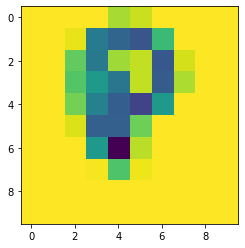

traindb/p4.png
[0.981975995700449, 0.013078969630474691, 0.004739878292100937]
predicted P


In [17]:
folderPath = [["testdb/"], ["traindb/"]]
testModel(folderPath[0], parameters)
testModel(folderPath[1], parameters)

In [18]:
def runPrediction(alpha):
    folderPath = ["traindb/p/", "traindb/n/", "traindb/a/"]
    images, inputMatrix, outputMatrix= getInputFeature(folderPath, True)

    inputMatrix, outputMatrix = inputMatrix.T, outputMatrix.T
        

    parameters = []
    layer_one_param = initParameters(100, 10)
    layer_two_param = initParameters(10, 3)
    
    parameters.append(layer_one_param)
    parameters.append(layer_two_param)
    
    parameters = trainModel(inputMatrix, outputMatrix, parameters, alpha)

    
    folderPath = [["testdb/"], ["traindb/"]]
    testModel(folderPath[0], parameters)


## For each case we have taken threshold as 
cost < 0.005        
    or          
epoch > 100000

For given learning rate, 0.01
iteration #100000 
  Cost: 0.0009774800005388972 
  Error: 0.01466220000808346
Input:
 3


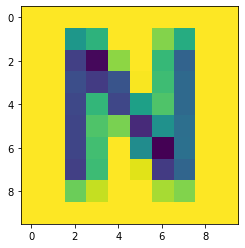

testdb/N1.png
[0.016883252370520737, 0.9548678814519037, 0.03454770782623038]
predicted N


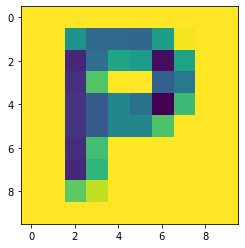

testdb/P1.png
[0.7729079886978012, 0.296955548468671, 0.005672193884511761]
predicted P


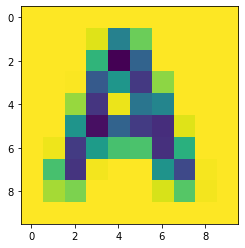

testdb/A1.png
[0.0036919597616535136, 0.05204160484595443, 0.951855152495471]
predicted A


In [19]:
print("For given learning rate, 0.01")
runPrediction(0.01)

For given learning rate, 0.05
iteration #51460 
  Cost: 0.00033332626703373453 
  Error: 0.004999894005506018
Input:
 3


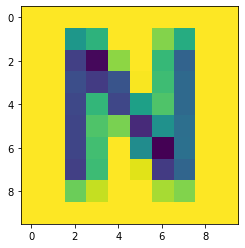

testdb/N1.png
[0.010242963372483859, 0.9720215088637968, 0.0211598353771494]
predicted N


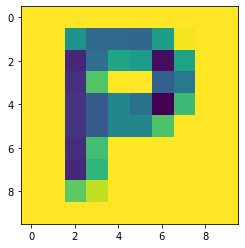

testdb/P1.png
[0.8075874387354198, 0.25892214967695343, 0.00349551918265632]
predicted P


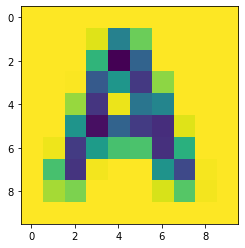

testdb/A1.png
[0.002350421795882471, 0.03411481630296696, 0.9688187919114383]
predicted A


In [20]:
print("For given learning rate, 0.05")
runPrediction(0.05)

For given learning rate, 0.1
iteration #25727 
  Cost: 0.00033332149521798996 
  Error: 0.004999822428269849
Input:
 3


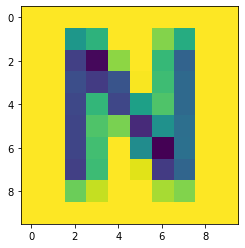

testdb/N1.png
[0.010245950739296057, 0.9720256391270792, 0.02114983525088259]
predicted N


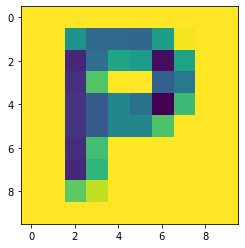

testdb/P1.png
[0.8074690787128449, 0.2587861336275012, 0.0034974399859946837]
predicted P


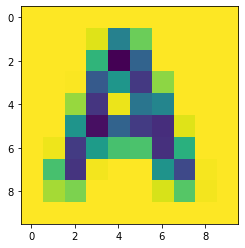

testdb/A1.png
[0.0023532333978531243, 0.034117495561496104, 0.9688014087451716]
predicted A


In [21]:
print("For given learning rate, 0.1")
runPrediction(0.1)

For given learning rate, 0.2
iteration #12860 
  Cost: 0.0003333087738985026 
  Error: 0.004999631608477539
Input:
 3


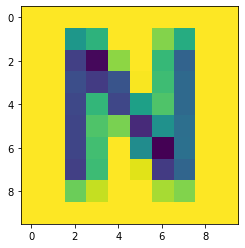

testdb/N1.png
[0.010253028602298734, 0.9720355048306633, 0.02112633618237471]
predicted N


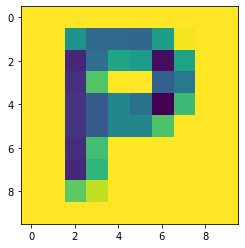

testdb/P1.png
[0.8071900649499596, 0.25846319306944304, 0.0035023539885329423]
predicted P


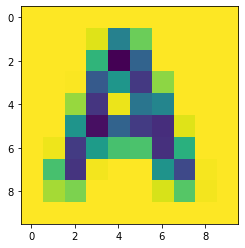

testdb/A1.png
[0.0023606346022019566, 0.03412645607217934, 0.9687593511410334]
predicted A


In [22]:
print("For given learning rate, 0.2")
runPrediction(0.2)

For given learning rate, 0.4
iteration #6424 
  Cost: 0.00033331441002300055 
  Error: 0.0049997161503450085
Input:
 3


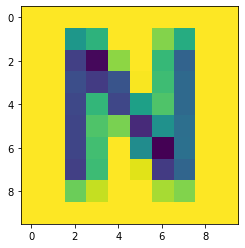

testdb/N1.png
[0.010275126603830086, 0.9720632401344907, 0.021060844866283335]
predicted N


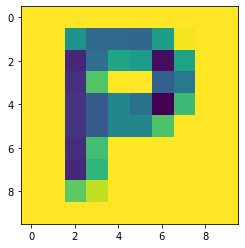

testdb/P1.png
[0.8063738277452815, 0.2575258339971514, 0.0035195282292299563]
predicted P


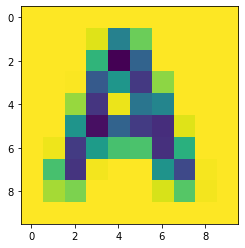

testdb/A1.png
[0.002388917901864655, 0.03416932161174164, 0.9686268581847736]
predicted A


In [23]:
print("For given learning rate, 0.4")
runPrediction(0.4)

For given learning rate, 0.8
iteration #3203 
  Cost: 0.00033324588719066053 
  Error: 0.004998688307859908
Input:
 3


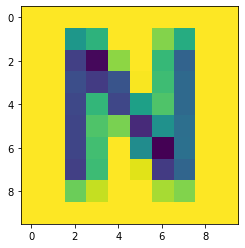

testdb/N1.png
[0.010377774683130142, 0.9721811304876952, 0.020861021284228932]
predicted N


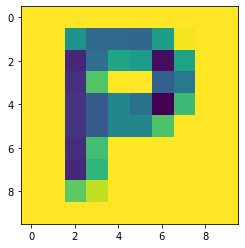

testdb/P1.png
[0.8037160758681988, 0.2541805721722357, 0.0036095805013784147]
predicted P


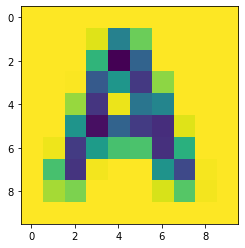

testdb/A1.png
[0.00262665867165834, 0.03440748814922758, 0.968041581880116]
predicted A


In [24]:
print("For given learning rate, 0.8")
runPrediction(0.8)